In [1]:
import pandas as pd
import numpy as np

In [3]:
As = pd.read_csv(r'Alcohol_Sales.csv')

In [5]:
As

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [7]:
As.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [9]:
As.DATE = pd.to_datetime(As.DATE , infer_datetime_format = True)

C:\Users\om\AppData\Local\Temp\ipykernel_9408\3892066436.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  As.DATE = pd.to_datetime(As.DATE , infer_datetime_format = True)


In [11]:
As.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            325 non-null    datetime64[ns]
 1   S4248SM144NCEN  325 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [13]:
As = As.set_index(['DATE'])

In [15]:
As

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


In [17]:
# We will check if our series is stationary or not

In [19]:
import matplotlib.pyplot as plt

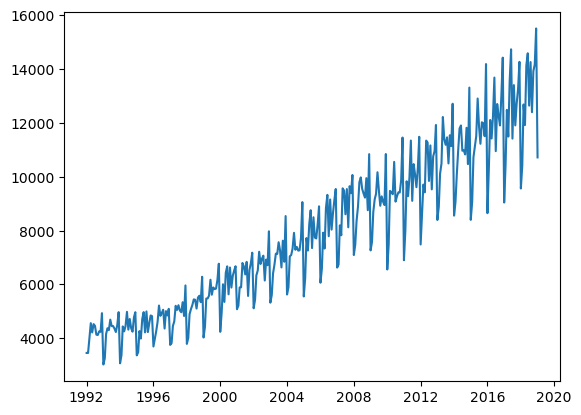

In [21]:
plt.plot(As)

In [23]:
# the series which we got is not stationary anmd we have to make it stationary.

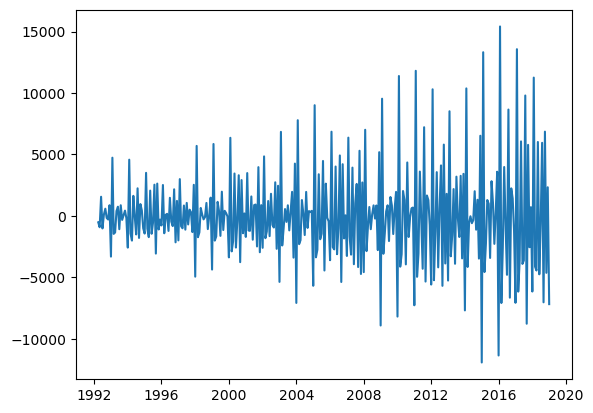

In [29]:
plt.plot(As.diff().diff().diff())

In [31]:
# Even after multiple level of differencing sereies does not became Stationary.
# We are going to take the log of the series

In [33]:
As_log = np.log(As)

In [35]:
As_log

,S4248SM144NCEN
DATE,
1992-01-01,8.148735
1992-02-01,8.148446
1992-03-01,8.294550
1992-04-01,8.425955
1992-05-01,8.347827
...,...
2018-09-01,9.425129
2018-10-01,9.540651
2018-11-01,9.559165


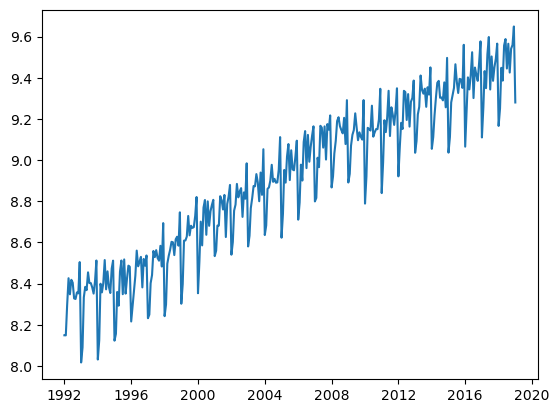

In [37]:
plt.plot(As_log)

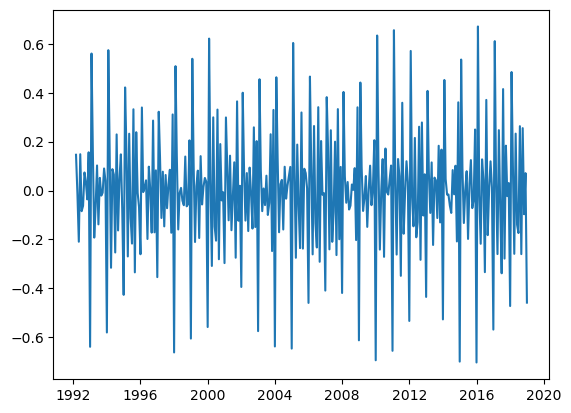

In [39]:
plt.plot(As_log.diff().diff())

In [41]:
# After taking log and applying differencing we get the series Stationary.
# If you are using the Log you model varience andf mean will be constant.
# for building a model we nee 3 thing are p,d,q and we know ( p=? , d=1 , q=? )

In [43]:
# To find the p and q we need to use ACF and PACF

In [45]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

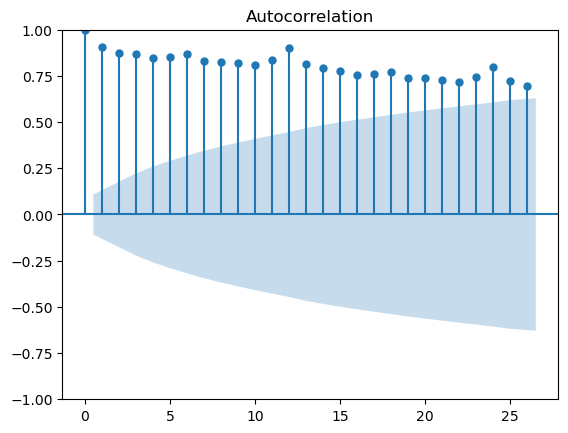

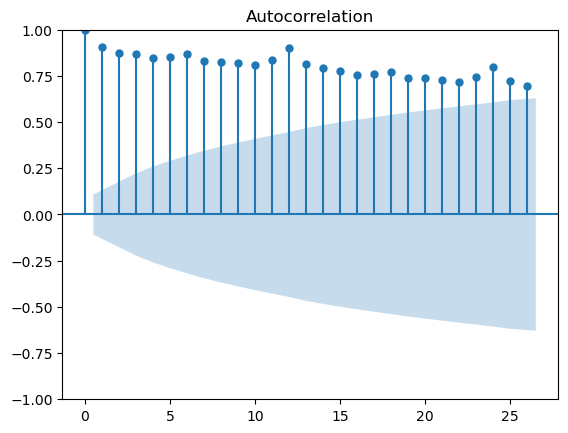

In [47]:
plot_acf(As_log)

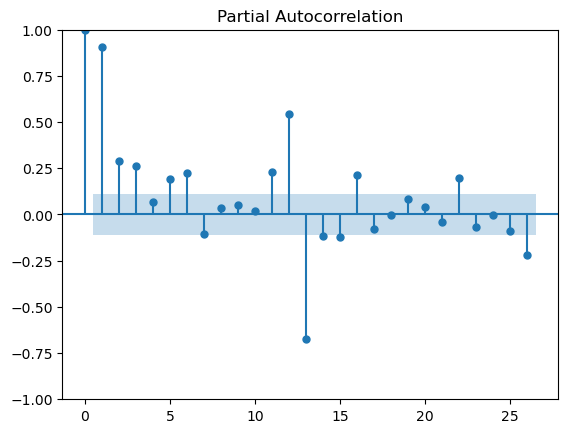

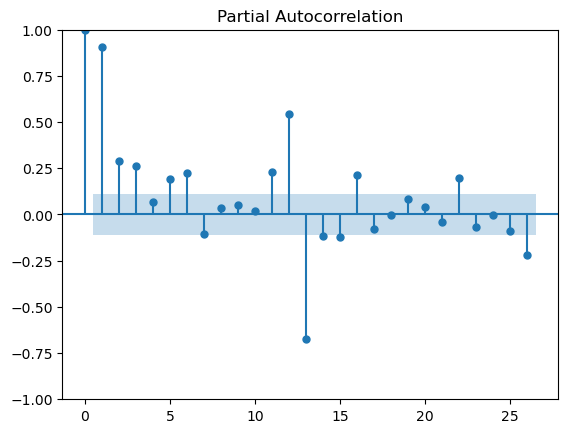

In [49]:
plot_pacf(As_log)

In [51]:
# ARIMA 

In [53]:
from statsmodels.tsa.arima_model import ARIMA

In [59]:
# model = ARIMA(As_log.Passengers , order = (2,1,0))

In [63]:
# How to use the SARIMA and SARIMAX?

# WE will use auto_arima and whatever values we will get from auto arima we are going to pass it into our model 

In [65]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [67]:
result = seasonal_decompose(As_log)

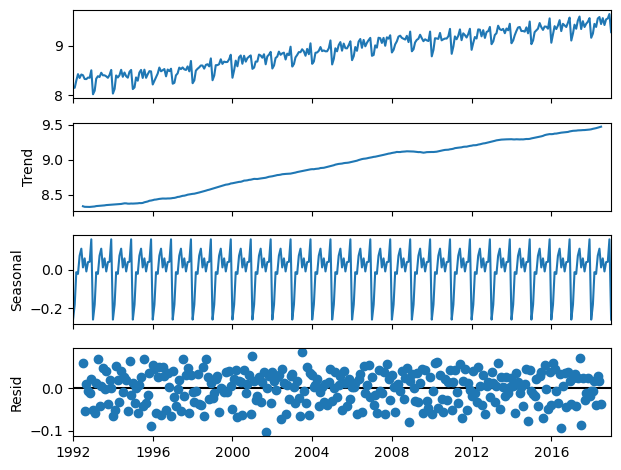

In [69]:
result.plot();
# this plot is to just get the idea about data.

In [71]:
auto_arima(As_log , seasonal=True , m=12)

# m  is time period 

ARIMA(order=(4, 1, 0), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [73]:
# Whatever Values  will get from auto_arima we will passss them in SARIMAX

In [75]:
model_sarima = SARIMAX(As_log , order=(4,1,0) , seasonal_order =(1,0,2,12))

C:\Users\om\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\om\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [77]:
As_model = model_sarima.fit()

C:\Users\om\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [79]:
pred_values = As_model.predict(start =144 , end=155)
pred_values

2004-01-01    8.642313
2004-02-01    8.660840
2004-03-01    8.852400
2004-04-01    8.860682
2004-05-01    8.937296
2004-06-01    8.972217
2004-07-01    8.948151
2004-08-01    8.942136
2004-09-01    8.864765
2004-10-01    8.918323
2004-11-01    8.903925
2004-12-01    9.062223
Freq: MS, Name: predicted_mean, dtype: float64

In [81]:
prd_values1 = np.exp(pred_values)
prd_values1

2004-01-01    5666.423349
2004-02-01    5772.381463
2004-03-01    6991.149491
2004-04-01    7049.285928
2004-05-01    7610.588109
2004-06-01    7881.051401
2004-07-01    7693.651231
2004-08-01    7647.518246
2004-09-01    7078.126354
2004-10-01    7467.554698
2004-11-01    7360.808413
2004-12-01    8623.302920
Freq: MS, Name: predicted_mean, dtype: float64

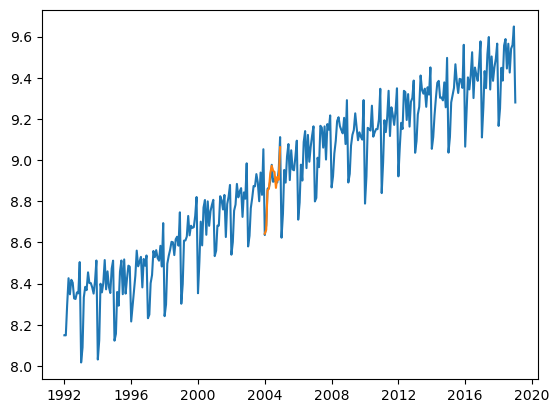

In [83]:
plt.plot(As_log)
plt.plot(pred_values)

In [87]:
df = pd.DataFrame()
df['Predicted'] = prd_values1
date_for_pred = ['2004-01-01', '2004-02-01','2004-03-01','2004-04-01','2004-05-01','2004-06-01',
                 '2004-07-01','2004-08-01','2004-09-01','2004-10-01','2004-11-01','2004-12-01']
df['DATE'] = date_for_pred

df.DATE = pd.to_datetime(df.DATE , infer_datetime_format = True)
df = df.set_index(['DATE'])

C:\Users\om\AppData\Local\Temp\ipykernel_9408\2314467535.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df.DATE = pd.to_datetime(df.DATE , infer_datetime_format = True)


In [89]:
df

,Predicted
DATE,
2004-01-01,5666.423349
2004-02-01,5772.381463
2004-03-01,6991.149491
2004-04-01,7049.285928
2004-05-01,7610.588109
2004-06-01,7881.051401
2004-07-01,7693.651231
2004-08-01,7647.518246
2004-09-01,7078.126354


<Axes: xlabel='DATE'>

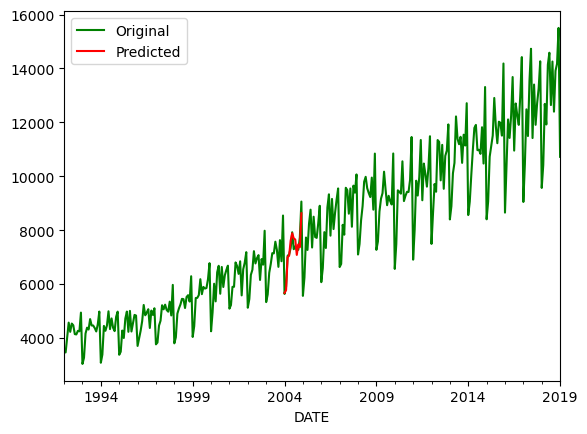

In [107]:
As['S4248SM144NCEN'].plot(legend=True , label='Original', color='green')
df['Predicted'].plot(legend=True, label='Predicted' , color='red')